## About Dataset

The data in this dataset is collected from FRED.

Columns : date, house_price_index, population, house_supply, gdp, mortage_rate, employement_rate, permit_new, ppi_res, m3, cci, delinquency_rate, hcai

## Task 

- Performing statistical analysis and finding features and find the values by which these features affect the house price index

## Data Preprocessing

In [2]:
import numpy as np
import pandas as pd

D:\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
D:\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
data = pd.read_csv('Housing_Macroeconomic_Factors_US.csv')
data.head()

,Date,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
0,1987-01-01,63.965,241857,6.0,99.902813,9.2040,70.163085,1690.0,100.0,2.7439,100.4624,NaN,NaN
1,1987-02-01,64.424,242005,6.2,99.875864,9.0825,70.289205,1689.0,100.4,2.7475,100.4945,NaN,NaN
2,1987-03-01,64.735,242166,6.0,99.869734,9.0350,70.321678,1704.0,100.7,2.7537,100.5720,NaN,NaN
3,1987-04-01,65.132,242338,6.0,99.882087,9.8325,70.499062,1601.0,101.1,2.7677,100.6568,NaN,NaN
4,1987-05-01,65.565,242516,6.7,99.910371,10.5960,70.808308,1500.0,101.3,2.7729,100.6919,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               425 non-null    object 
 1   house_price_index  425 non-null    float64
 2   population         425 non-null    int64  
 3   house_supply       425 non-null    float64
 4   gdp                422 non-null    float64
 5   mortgage_rate      422 non-null    float64
 6   employment_rate    422 non-null    float64
 7   permit_new         422 non-null    float64
 8   ppi_res            422 non-null    float64
 9   m3                 422 non-null    float64
 10  cci                422 non-null    float64
 11  delinquency_rate   374 non-null    float64
 12  hcai               285 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 43.3+ KB


- as we can see there are missing values in delinquency_rate and hcai, I think it is better to drop these rows with missing values.
- and the date is in object datatpye so we need to convert into date.

In [7]:
data.describe()

,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
count,425.000000,425.000000,425.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,374.000000,285.000000
mean,135.887280,291988.251765,5.813412,99.955457,6.328301,70.759327,1346.962085,166.813685,7.666456,100.124667,3.984947,8.981895
std,53.684802,28193.599715,1.691079,1.124453,2.209432,2.247253,394.776877,43.943882,4.656247,1.466327,2.912758,6.855745
min,63.965000,241857.000000,3.300000,91.543057,2.684000,60.261014,513.000000,100.000000,2.743900,96.460330,1.400000,2.293000
25%,81.620000,267829.000000,4.400000,99.559318,4.266250,69.317138,1077.250000,133.500000,3.615025,99.106098,2.130000,2.642000
50%,139.727000,293857.000000,5.500000,99.977924,6.257250,71.221613,1362.000000,154.750000,6.297450,100.498000,2.470000,5.958000
75%,174.802000,317156.000000,6.700000,100.556927,7.912000,72.281388,1614.750000,207.400000,10.617625,101.063150,4.490000,15.779000
max,304.831000,332928.000000,12.200000,101.825852,11.260000,74.507436,2263.000000,303.546000,21.749700,102.977600,11.360000,21.774000


In [8]:
print("Shape of data:",data.shape)

Shape of data: (425, 13)


- Shape specifies that we have 425 rows and 13 columns

In [9]:
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               425 non-null    datetime64[ns]
 1   house_price_index  425 non-null    float64       
 2   population         425 non-null    int64         
 3   house_supply       425 non-null    float64       
 4   gdp                422 non-null    float64       
 5   mortgage_rate      422 non-null    float64       
 6   employment_rate    422 non-null    float64       
 7   permit_new         422 non-null    float64       
 8   ppi_res            422 non-null    float64       
 9   m3                 422 non-null    float64       
 10  cci                422 non-null    float64       
 11  delinquency_rate   374 non-null    float64       
 12  hcai               285 non-null    float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 43.3 KB

In [12]:
data = data.dropna().set_index('Date')
data[:5]

,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
Date,,,,,,,,,,,,
1998-01-01,87.616,274732,4.0,99.994570,6.9940,73.705376,1555.0,137.3,4.0562,102.5385,2.16,10.024
1998-02-01,88.004,274943,3.9,99.980549,7.0425,73.776106,1647.0,137.5,4.0889,102.7129,2.16,10.024
1998-03-01,88.443,275175,4.1,99.975298,7.1275,73.798698,1605.0,137.5,4.1143,102.7210,2.16,10.024
1998-04-01,88.879,275434,4.0,99.984454,7.1400,73.869665,1547.0,137.9,4.1402,102.6981,2.03,9.668
1998-05-01,89.365,275700,3.9,100.013988,7.1440,73.880942,1554.0,137.6,4.1644,102.5923,2.03,9.668


## Finding correlation between each features

In [13]:
data_corr = data.corr()

In [14]:
data_corr

,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
house_price_index,1.000000,0.839224,0.242975,-0.168801,-0.703353,-0.377120,-0.010753,0.824287,0.865751,-0.199710,-0.076667,-0.446426
population,0.839224,1.000000,0.236918,-0.253623,-0.917155,-0.667300,-0.429730,0.966883,0.939660,-0.298246,0.347681,-0.812660
house_supply,0.242975,0.236918,1.000000,0.077478,-0.075973,-0.263978,-0.598446,0.268735,0.077569,-0.619238,0.373916,-0.270590
gdp,-0.168801,-0.253623,0.077478,1.000000,0.397346,0.569070,0.158752,-0.182743,-0.339884,0.372289,-0.175718,0.236192
mortgage_rate,-0.703353,-0.917155,-0.075973,0.397346,1.000000,0.774149,0.426677,-0.887792,-0.873620,0.377073,-0.458536,0.791513
employment_rate,-0.377120,-0.667300,-0.263978,0.569070,0.774149,1.000000,0.677676,-0.645726,-0.549223,0.686113,-0.775166,0.649549
permit_new,-0.010753,-0.429730,-0.598446,0.158752,0.426677,0.677676,1.000000,-0.452190,-0.240966,0.613082,-0.885838,0.714809
ppi_res,0.824287,0.966883,0.268735,-0.182743,-0.887792,-0.645726,-0.452190,1.000000,0.939083,-0.329916,0.382443,-0.827442
m3,0.865751,0.939660,0.077569,-0.339884,-0.873620,-0.549223,-0.240966,0.939083,1.000000,-0.176196,0.149472,-0.755793
cci,-0.199710,-0.298246,-0.619238,0.372289,0.377073,0.686113,0.613082,-0.329916,-0.176196,1.000000,-0.658309,0.311164


In [18]:
import seaborn as sb
import matplotlib.pyplot as plt

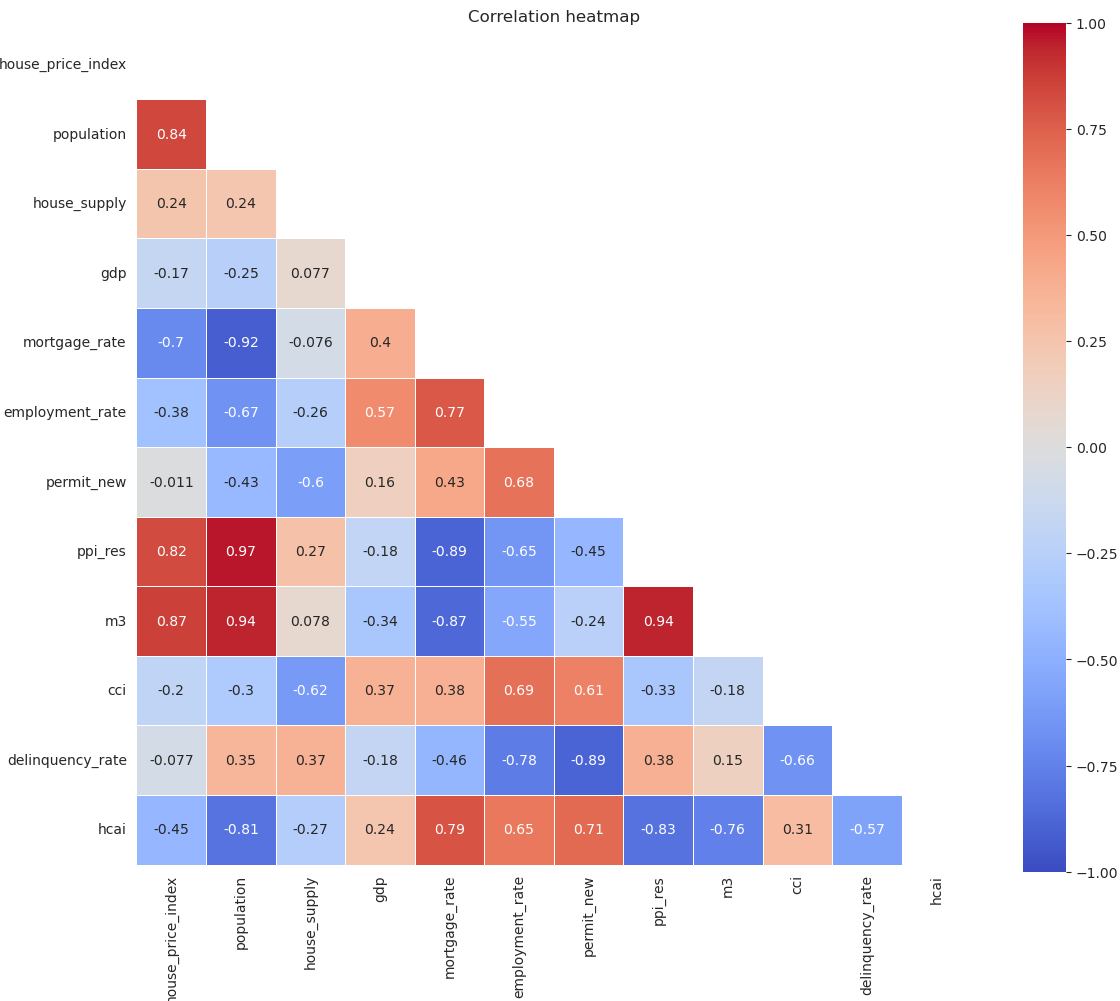

In [21]:
mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True
with sb.axes_style('white'):
    f,ax = plt.subplots(figsize=(12,10))
    ax = sb.heatmap(data_corr,mask=mask,vmax=1,vmin=-1,linewidth=.5,square=True,cmap='coolwarm',annot=True)
    plt.title('Correlation heatmap')
    plt.yticks(rotation=0)
    plt.tight_layout()

- Here house_price_index has very strong linear relationship with population, ppi_res and m3.
- It also has strong negative relationship with mortage_rate.
- And population has also strong relationship with ppi_res and m3 and strong negative relationship with mortage_rate.

## Data Modelling

**Feature Scaling**

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
df = data.copy().reset_index()
df = df.drop(columns=['Date'])

In [23]:
df[:5]

,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
0,87.616,274732,4.0,99.994570,6.9940,73.705376,1555.0,137.3,4.0562,102.5385,2.16,10.024
1,88.004,274943,3.9,99.980549,7.0425,73.776106,1647.0,137.5,4.0889,102.7129,2.16,10.024
2,88.443,275175,4.1,99.975298,7.1275,73.798698,1605.0,137.5,4.1143,102.7210,2.16,10.024
3,88.879,275434,4.0,99.984454,7.1400,73.869665,1547.0,137.9,4.1402,102.6981,2.03,9.668
4,89.365,275700,3.9,100.013988,7.1440,73.880942,1554.0,137.6,4.1644,102.5923,2.03,9.668


In [25]:
scaler = MinMaxScaler()
n_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns,index=df.index)
n_df.head()

,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
0,0.000000,0.000000,0.078652,0.821908,0.739153,0.943701,0.595429,0.001452,0.000000,0.932625,0.076305,0.396848
1,0.002124,0.003659,0.067416,0.820545,0.747470,0.948666,0.648000,0.002905,0.001931,0.959385,0.076305,0.396848
2,0.004528,0.007682,0.089888,0.820034,0.762048,0.950251,0.624000,0.002905,0.003431,0.960628,0.076305,0.396848
3,0.006915,0.012172,0.078652,0.820924,0.764191,0.955233,0.590857,0.005810,0.004960,0.957114,0.063253,0.378574
4,0.009576,0.016785,0.067416,0.823797,0.764877,0.956024,0.594857,0.003631,0.006389,0.940880,0.063253,0.378574


**Splitting the dataset**

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
X_train,X_test, y_train,y_test = train_test_split(n_df.drop(columns='house_price_index', axis=1), n_df['house_price_index'], test_size=0.30, random_state=40)

**performing various regression models**

In [32]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [36]:
model1 = Ridge(alpha=1.0)
scores1 = cross_val_score(model1, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores1 = np.absolute(scores1)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores1), np.std(scores1)))

Mean MAE: 0.025 (0.005)


In [37]:
model2 = Lasso(alpha=1.0)
scores2 = cross_val_score(model2, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = np.absolute(scores2)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores2), np.std(scores2)))

Mean MAE: 0.161 (0.035)


In [43]:
model3 = BayesianRidge()
scores3 = cross_val_score(model3, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores3 = np.absolute(scores3)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores3), np.std(scores3)))

Mean MAE: 0.021 (0.005)


In [41]:
model4 = LinearRegression()
scores4 = cross_val_score(model4, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores4 = np.absolute(scores4)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores4), np.std(scores4)))

Mean MAE: 0.021 (0.005)


- so here BayesianRidge and linear regression had the best score. chosing BayesianRidge for further optimization

**Model Fitting**

In [44]:
model_br= BayesianRidge(alpha_1=0, alpha_2=1, lambda_1=9, lambda_2=9)
fit_data = model_br.fit(X_train, y_train)

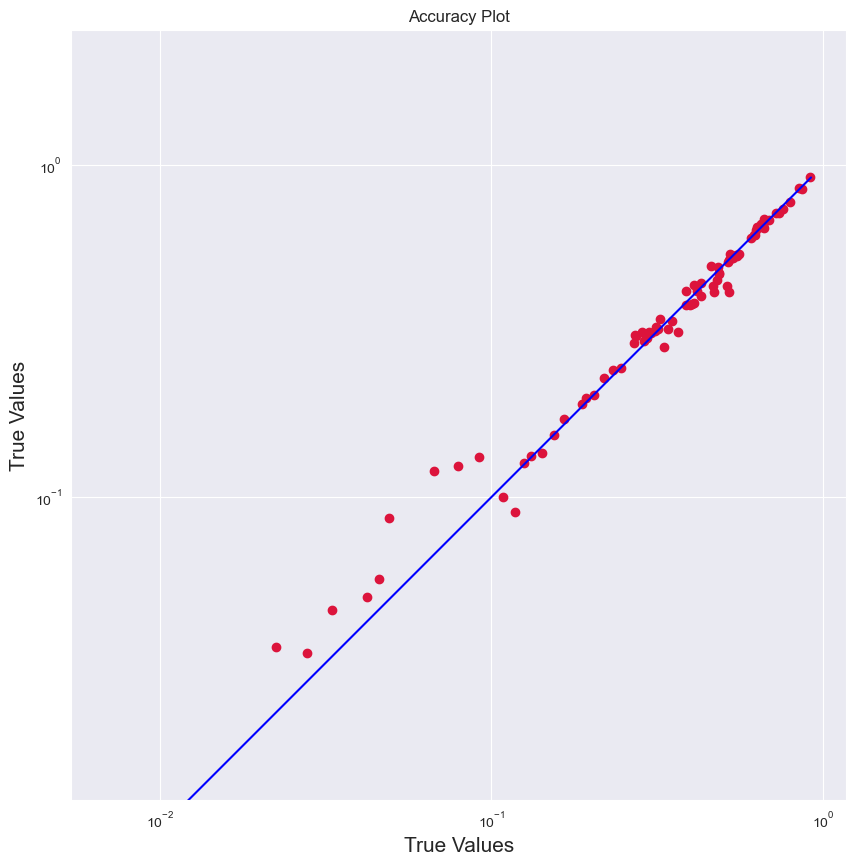

In [49]:
# pridiction

sb.set_style("darkgrid")
%matplotlib inline

pred = fit_data.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1,p2],[p1,p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.title('Accuracy Plot')
plt.axis('equal')
plt.show()

**Bias-Variance Check**

In [54]:
from mlxtend.evaluate import bias_variance_decomp
X_tr = X_train.to_numpy(dtype ='float32')
X_tst = X_test.to_numpy(dtype ='float32')
y_tr = y_train.to_numpy(dtype ='float32')
y_tst = y_test.to_numpy(dtype ='float32')

mse, bias, variance = bias_variance_decomp(model_br, X_tr, y_tr, X_tst, y_tst, 
                                           loss='mse', num_rounds=200, random_seed=123)
print("Average Bias : ", bias)
print("Average Variance : ", variance)

Average Bias :  0.0007025169596903938
Average Variance :  5.185576727522386e-05


In [56]:
rmse=np.sqrt(mean_squared_error(y_test, pred))
print('RMSE: ', rmse)
r2 = r2_score(y_test, pred)
print('R squared: ', r2)

RMSE:  0.026585648218241935
R squared:  0.9865736979165105
